In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import forestplot as fp
import statsmodels.api as sm
import scipy.stats as stats
import pingouin as pg

In [46]:
# help(pm)

### RISK OF BIAS PLOT

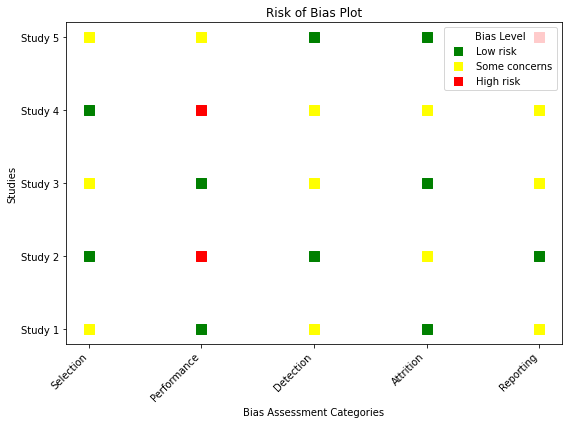

In [106]:
import matplotlib.pyplot as plt

# Example data (modify this with your actual data)
study_names = ["Study 1", "Study 2", "Study 3", "Study 4", "Study 5"]
bias_types = ["Selection", "Performance", "Detection", "Attrition", "Reporting"]
bias_assessment = [
    [1, 0, 1, 0, 1],  # Study 1
    [0, 2, 0, 1, 0],  # Study 2
    [1, 0, 1, 0, 1],  # Study 3
    [0, 2, 1, 1, 1],  # Study 4
    [1, 1, 0, 0, 2],  # Study 5
]

# Define colors for bias assessment categories
colors = {
    0: 'green',   # Low risk of bias
    1: 'yellow',  # Some concerns
    2: 'red',     # High risk of bias
}

# Create the risk of bias plot
fig, ax = plt.subplots(figsize=(8, 6))

# Iterate through studies and bias types
for i, study_name in enumerate(study_names):
    for j, bias_type in enumerate(bias_types):
        bias_score = bias_assessment[i][j]
        color = colors[bias_score]
        ax.scatter(j, i, marker='s', s=100, c=color, label=bias_type)

# Customize plot appearance
ax.set_xticks(range(len(bias_types)))
ax.set_xticklabels(bias_types, rotation=45, ha="right")
ax.set_yticks(range(len(study_names)))
ax.set_yticklabels(study_names)
ax.set_xlabel("Bias Assessment Categories")
ax.set_ylabel("Studies")
ax.set_title("Risk of Bias Plot")

# Create a legend
legend_labels = [plt.Line2D([0], [0], marker='s', color='w', markersize=10, markerfacecolor=colors[i], label=label)
                 for i, label in enumerate(["Low risk", "Some concerns", "High risk"])]
ax.legend(handles=legend_labels, title="Bias Level", loc='upper right')

plt.tight_layout()

plt.savefig('Sample_Bias.png', bbox_inches = 'tight')
plt.show()

In [48]:
df_hesit = pd.read_csv('vaccine hesitancy.csv')

df_accept = pd.read_csv('VACCINE ACCEPTANCE.csv')

df_intent = pd.read_csv('vaccine intention.csv')

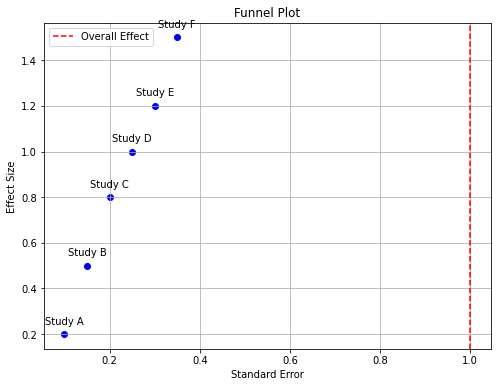

In [49]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
effect_sizes = [0.2, 0.5, 0.8, 1.0, 1.2, 1.5]
standard_errors = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
study_labels = ['Study A', 'Study B', 'Study C', 'Study D', 'Study E', 'Study F']

# Create the funnel plot
plt.figure(figsize=(8, 6))
plt.scatter(standard_errors, effect_sizes, color='blue', marker='o')

# Add a horizontal line at the overall effect size (optional)
overall_effect = 1.0  # Replace with your actual overall effect size
plt.axvline(x=overall_effect, color='red', linestyle='--', label='Overall Effect')

# Label the studies
for i, label in enumerate(study_labels):
    plt.annotate(label, (standard_errors[i], effect_sizes[i]), textcoords="offset points", xytext=(0, 10), ha='center')

# Customize the plot appearance
plt.xlabel('Standard Error')
plt.ylabel('Effect Size')
plt.title('Funnel Plot')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


## VACCINE INTENTION RATE

In [50]:
df_intent.head(2)

,Study,States(s),Date of survey,Setting,Target population,Sample size,Number intended,Vaccine intention rate,95% CI LOW,95% CI HIGH,95% CI,Standard Error
0,Adigwe (2021),FCT,Jan-21,Online and physical survey,General population,1767,401.0,22.70%,20.74,24.65,24.65,0.0100
1,Okafor et al. (2021),Nationwide,Not available,Online,General population,689,298.0,43.30%,39.55,46.95,46.95,0.0189


In [51]:
# Removing the percetage signs in the vaccine intention rate column

df_intent["Vaccine intention rate"] = df_intent["Vaccine intention rate"].apply(lambda x:x.strip()[:-1]) 

In [52]:
df_intent["Vaccine intention rate"] = df_intent["Vaccine intention rate"].astype(float)

In [53]:
df_intent["Vaccine intention rate"] = df_intent["Vaccine intention rate"]/100

df_intent["95% CI LOW"] = df_intent["95% CI LOW"]/100

df_intent["95% CI HIGH"] = df_intent["95% CI HIGH"]/100


In [54]:
df_intent.dtypes

Study                      object
States(s)                  object
Date of survey             object
Setting                    object
Target population          object
Sample size                 int64
Number intended           float64
Vaccine intention rate    float64
95% CI LOW                float64
95% CI HIGH               float64
95% CI                     object
Standard Error            float64
dtype: object

* __Calculating Standard Error__

In [55]:
# df_intent["SE"] = np.sqrt((df_intent['Vaccine intention rate'] * (1- df_intent['Vaccine intention rate']))/df_intent['Sample size'])

* __Calculating Study Weights__

In [56]:
df_intent['Variance of Intention'] = df_intent['Vaccine intention rate'].var()

df_intent["Study Weights"] = 1/(df_intent['Variance of Intention'])

# converting to percentage

total_weight = df_intent['Study Weights'].sum()

df_intent['weight percent'] = (df_intent['Study Weights']/total_weight) *100

* __Standardizing Vaccine Intention Rates__

In [57]:
mean = df_intent['Vaccine intention rate'].mean()
stand = df_intent['Vaccine intention rate'].std()

# df_intent['Vaccine Intention Rates (Z Scores)'] = (df_intent['Vaccine intention rate']-mean)/stand

> * I won't be using the z scores since this means I would also have to standardize the confidence intervals.

> * Too much work

## FOREST PLOTS

In [104]:
df_intent.sample(2)

,Study,States(s),Date of survey,Setting,Target population,Sample size,Number intended,Vaccine_intention_rate,95% CI LOW,95% CI HIGH,95% CI,Standard Error,Variance of Intention,Study Weights,weight percent
14,Iliyasu et al. (2021)b,Kano,Not available,Hospital,PLHIV ≥18 years old,344,158.9,0.462,0.4095,0.5149,40.95 - 51.49%,0.0269,0.041003,24.388751,3.225806
25,Tobin et al. (2021),Nationwide,Jun to Aug 2020,Online,General population,1228,616.5,0.502,0.4745,0.5304,47.45 - 53.04%,0.5024,0.041003,24.388751,3.225806


> __For Vaccine Intention Rates__

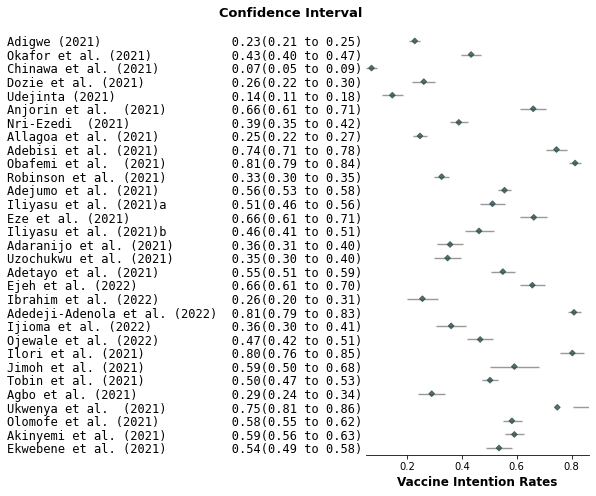

In [105]:
markersize = df_intent['weight percent']*5 # To make the markers a representation of the study weights

fp.forestplot(df_intent, 
              estimate="Vaccine_intention_rate", 
              ll="95% CI LOW",
             hl = "95% CI HIGH",
             varlabel = 'Study',
             ylabel = 'Confidence Interval',
#              annote = ['Study Weights', ],
#              annoteheaders = ['Study Weights'],
#              weights = df_intent['Study Weights'],
             xlabel = 'Vaccine Intention Rates',
             table = True,
             **{'marker': "D", "markersize":markersize}) # Study weights

plt.savefig('Forest_Intention.png', bbox_inches = 'tight')

plt.show()

* __Test for Heterogeneity__

> Using a random effects model

In [60]:
df_intent['Vaccine intention rate'].shape[0]

31

In [61]:
df_intent.rename(columns = {'Vaccine intention rate': 'Vaccine_intention_rate'}, inplace=True)

In [62]:
from statsmodels.regression.mixed_linear_model import MixedLM #package that'll used to estimate tau squared


model = MixedLM.from_formula("Vaccine_intention_rate ~ 1", data=df_intent, groups='Target population')  # Intercept-only model
result = model.fit()

# Extract the estimated tau squared from the results
tau_squared_estimate = result.cov_re.iloc[0, 0]

# Test for heterogeneity using the Q-test
Q_statistic = result.llf  # Q-statistic from the model
degrees_of_freedom = df_intent['Vaccine_intention_rate'].shape[0] - 1  # Degrees of freedom
p_value_heterogeneity = 1 - stats.chi2.cdf(Q_statistic, degrees_of_freedom)

# Calculate the I² statistic
I_squared = (Q_statistic - degrees_of_freedom) / Q_statistic

# Print the results
print(f"Q-Statistic: {Q_statistic}")
print(f"P-Value for Heterogeneity: {p_value_heterogeneity}")
print(f"I² Statistic: {I_squared}")

c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  ConvergenceWarning)
c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2202: ConvergenceWarning: Retrying MixedLM optimization with cg
  ConvergenceWarning)


Q-Statistic: 3.6220727439080562
P-Value for Heterogeneity: 0.9999999989585219
I² Statistic: -7.282550385123223


c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 0.157869
  warnings.warn(msg, ConvergenceWarning)
c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
c:\users\lenovo\appdata\local\programs\python\

* Above cell doesn't run cos to use the __random effects model__, there must be __groups__

## Funnel Plot for Vaccine Intention Rate

In [63]:
df_intent.head()

,Study,States(s),Date of survey,Setting,Target population,Sample size,Number intended,Vaccine_intention_rate,95% CI LOW,95% CI HIGH,95% CI,Standard Error,Variance of Intention,Study Weights,weight percent
0,Adigwe (2021),FCT,Jan-21,Online and physical survey,General population,1767,401.0,0.227,0.2074,0.2465,24.65,0.0100,0.041003,24.388751,3.225806
1,Okafor et al. (2021),Nationwide,Not available,Online,General population,689,298.0,0.433,0.3955,0.4695,46.95,0.0189,0.041003,24.388751,3.225806
2,Chinawa et al. (2021),Ebonyi and Enigu,Not available,Hospital,Mothers,577,39.8,0.069,0.0486,0.0900,9.00,0.0106,0.041003,24.388751,3.225806
3,Dozie et al. (2021),Imo,Not available,Community,General population,436,113.4,0.260,0.2180,0.3003,30.03,0.0210,0.041003,24.388751,3.225806
4,Udejinta (2021),Oyo,Not available,School,Employees of tertiary institutions,325,47.1,0.145,0.1064,0.1829,18.29,0.0195,0.041003,24.388751,3.225806


In [ ]:
df_intent['Standard Error'][6]

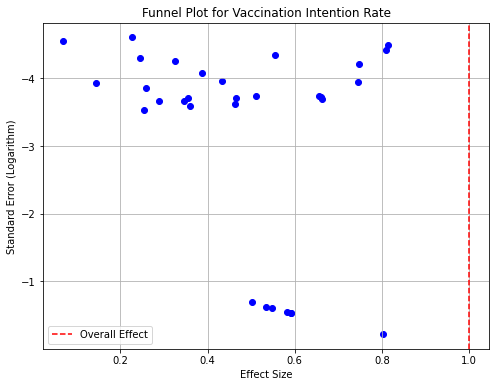

In [102]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
# effect_sizes = [0.2, 0.5, 0.8, 1.0, 1.2, 1.5]
# standard_errors = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
# study_labels = ['Study A', 'Study B', 'Study C', 'Study D', 'Study E', 'Study F']

# Create the funnel plot
plt.figure(figsize=(8, 6))
plt.scatter(df_intent['Vaccine_intention_rate'], np.log(df_intent['Standard Error']), color='blue', marker='o')

# Add a horizontal line at the overall effect size (optional)
overall_effect = 1.0  # Replace with your actual overall effect size
plt.axvline(x=overall_effect, color='red', linestyle='--', label='Overall Effect')

# Label the studies
for i, label in df_intent['Study'].iteritems():
    plt.annotate(None, (df_intent['Standard Error'][i], df_intent['Vaccine_intention_rate'][i]), textcoords="offset points", xytext=(0, 10), ha='center') # we could add the label later anyway

# Customize the plot appearance
plt.ylabel('Standard Error (Logarithm)')
plt.xlabel('Effect Size')
plt.title('Funnel Plot for Vaccination Intention Rate')
plt.legend()
plt.grid(True)

plt.gca().invert_yaxis() # this is to reverse the y axis

plt.savefig('Funnel_Intention.png', bbox_inches = 'tight')


# Show the plot
plt.show()

In [44]:
df_intent.isna().all()

Study                     False
States(s)                 False
Date of survey            False
Setting                   False
Target population         False
Sample size               False
Number intended           False
Vaccine_intention_rate    False
95% CI LOW                False
95% CI HIGH               False
95% CI                    False
Standard Error            False
Variance of Intention     False
Study Weights             False
weight percent            False
dtype: bool

# For Vaccine Hesitation Rates

In [66]:
df_hesit.head(2)

,S No,Study,States(s),Date of survey,Setting,Target population,Sample size,Unnamed: 7,Hesitancy rate rate,95% CI LOW,95% CI HIGH,95%
0,1,Adigwe (2021),FCT,Jan-21,Online and physical survey,General population,1767,1297.0,73.40%,71.34,75.46,71.34 - 75.46
1,2,Anjorin et al. (2021),Nationwide,Feb - Mar 2021,Online,General population,386,131.2,34%,29.21,38.66,29.21 - 38.66


> * **Changing the percentage to actual numbers**

In [67]:
# df_hesit["Hesitancy rate rate"] = df_intent["Vaccine intention rate"]/100

df_hesit["95% CI LOW"] = df_hesit["95% CI LOW"]/100

df_hesit["95% CI HIGH"] = df_hesit["95% CI HIGH"]/100


In [68]:
df_hesit["Hesitancy rate rate"] = df_hesit["Hesitancy rate rate"].apply(lambda x:x.strip()[:-1]) 

df_hesit["Hesitancy rate rate"] = df_hesit["Hesitancy rate rate"].astype(float)

df_hesit["Hesitancy rate rate"] = df_hesit["Hesitancy rate rate"]/100

In [69]:
df_hesit["Hesitancy rate rate"].head()

0    0.734
1    0.340
2    0.265
3    0.754
4    0.505
Name: Hesitancy rate rate, dtype: float64

* __Calculating Study Weights__

In [70]:
#  standard error

df_hesit["SE"] = np.sqrt((df_hesit['Hesitancy rate rate'] * (1- df_hesit['Hesitancy rate rate']))/df_intent['Sample size'])

In [71]:
df_hesit["Hesitancy rate variance"] = df_hesit["Hesitancy rate rate"].var()

df_hesit["Study Weights"] = 1/(df_hesit["Hesitancy rate rate"])

# converting to percentage

total_weight = df_hesit['Study Weights'].sum()

df_hesit['weight percent'] = (df_hesit['Study Weights']/total_weight) *100

### FOREST PLOT

In [72]:
df_hesit.sample(1)

,S No,Study,States(s),Date of survey,Setting,Target population,Sample size,Unnamed: 7,Hesitancy rate rate,95% CI LOW,95% CI HIGH,95%,SE,Hesitancy rate variance,Study Weights,weight percent
13,14,Tobin et al. (2021),Nationwide,Jun to Aug 2020,Online,General population,1228,611.5,0.498,0.4704,0.5263,47.04 - 52.63,0.026426,0.039537,2.008032,3.547769


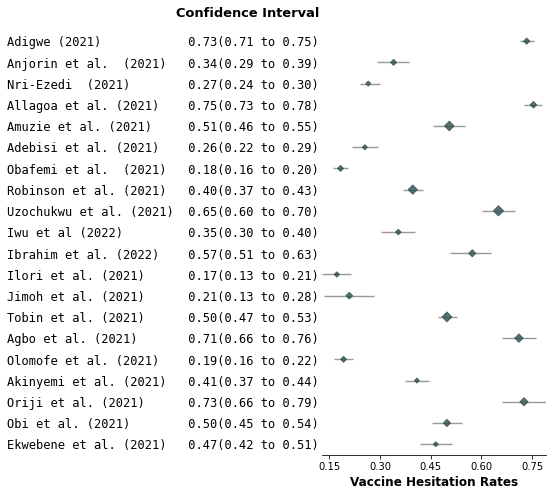

In [111]:
markersize = df_hesit['weight percent']*5 # To make the markers a representation of the study weights

fp.forestplot(df_hesit, 
              estimate="Hesitancy_rate_rate", 
              ll="95% CI LOW",
             hl = "95% CI HIGH",
             varlabel = 'Study',
             ylabel = 'Confidence Interval',
#              annote = ['Study Weights', ],
#              annoteheaders = ['Study Weights'],
#              weights = df_intent['Study Weights'],
             xlabel = 'Vaccine Hesitation Rates',
             title = "Vaccine Hesitation Rates",
#              table = True,
             **{'marker': "D", "markersize":markersize}) # Study weights

plt.savefig('Forest_Hesitation.png', bbox_inches='tight')

plt.show()

In [74]:
df_hesit.rename(columns = {'Hesitancy rate rate': 'Hesitancy_rate_rate'}, inplace=True)

In [75]:
df_hesit.head()

,S No,Study,States(s),Date of survey,Setting,Target population,Sample size,Unnamed: 7,Hesitancy_rate_rate,95% CI LOW,95% CI HIGH,95%,SE,Hesitancy rate variance,Study Weights,weight percent
0,1,Adigwe (2021),FCT,Jan-21,Online and physical survey,General population,1767,1297.0,0.734,0.7134,0.7546,71.34 - 75.46,0.010512,0.039537,1.362398,2.407070
1,2,Anjorin et al. (2021),Nationwide,Feb - Mar 2021,Online,General population,386,131.2,0.340,0.2921,0.3866,29.21 - 38.66,0.018047,0.039537,2.941176,5.196439
2,3,Nri-Ezedi (2021),34 states,Jan-21,Online,Doctors,831,220.2,0.265,0.2401,0.3011,24.01 - 30.11,0.018373,0.039537,3.773585,6.667129
3,4,Allagoa et al. (2021),Bayelsa,Jan - Feb 2021,Hospital,Patients attending OPD,1000,754.0,0.754,0.7273,0.7807,72.73 - 78.07,0.020626,0.039537,1.326260,2.343222
4,5,Amuzie et al. (2021),Abia,3/1/2021,Online,Healthcare workers,422,213.1,0.505,0.4570,0.5524,45.70 - 55.24,0.027734,0.039537,1.980198,3.498592


In [76]:
from statsmodels.regression.mixed_linear_model import MixedLM #package that'll used to estimate tau squared


model = MixedLM.from_formula("Hesitancy_rate_rate ~ 1", data=df_hesit, groups='Target population')  # Intercept-only model
result = model.fit()

# Extract the estimated tau squared from the results
tau_squared_estimate = result.cov_re.iloc[0, 0]

# Test for heterogeneity using the Q-test
Q_statistic = result.llf  # Q-statistic from the model
degrees_of_freedom = df_hesit['Hesitancy_rate_rate'].shape[0] - 1  # Degrees of freedom
p_value_heterogeneity = 1 - stats.chi2.cdf(Q_statistic, degrees_of_freedom)

# Calculate the I² statistic
I_squared = (Q_statistic - degrees_of_freedom) / Q_statistic

# Print the results
print(f"Q-Statistic: {Q_statistic}")
print(f"P-Value for Heterogeneity: {p_value_heterogeneity}")
print(f"I² Statistic: {I_squared}")

Q-Statistic: 2.395641099597423
P-Value for Heterogeneity: 0.9999983320512233
I² Statistic: -6.931071145503751


c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


### FOREST PLOT

In [93]:
df_hesit.head(1)

,S No,Study,States(s),Date of survey,Setting,Target population,Sample size,Unnamed: 7,Hesitancy_rate_rate,95% CI LOW,95% CI HIGH,95%,SE,Hesitancy rate variance,Study Weights,weight percent
0,1,Adigwe (2021),FCT,Jan-21,Online and physical survey,General population,1767,1297.0,0.734,0.7134,0.7546,71.34 - 75.46,0.010512,0.039537,1.362398,2.40707


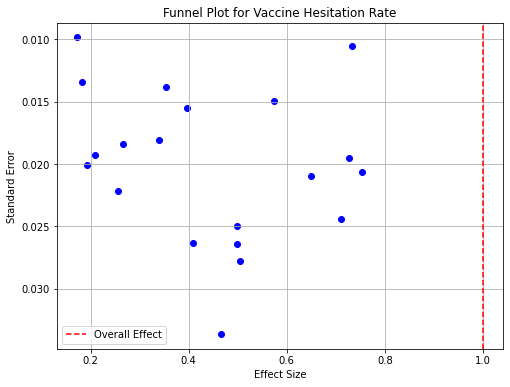

In [110]:
import matplotlib.pyplot as plt

# Example data (replace with your actual data)
# effect_sizes = [0.2, 0.5, 0.8, 1.0, 1.2, 1.5]
# standard_errors = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
# study_labels = ['Study A', 'Study B', 'Study C', 'Study D', 'Study E', 'Study F']

# Create the funnel plot
plt.figure(figsize=(8, 6))
plt.scatter(df_hesit['Hesitancy_rate_rate'], df_hesit['SE'], color='blue', marker='o')

# Add a horizontal line at the overall effect size (optional)
overall_effect = 1 # Replace with your actual overall effect size
plt.axvline(x=overall_effect, color='red', linestyle='--', label='Overall Effect')

# Label the studies
for i, label in df_hesit['Study'].iteritems():
    plt.annotate(None, (df_hesit['SE'][i], df_hesit['Hesitancy_rate_rate'][i]), textcoords="offset points", xytext=(0, 10), ha='center') # we could add the label later anyway

    
#     Plotting the Confidence Intervals

# plt.plot(df_hesit['95% CI LOW'], df_hesit['SE'])

# Customize the plot appearance
plt.ylabel('Standard Error')
plt.xlabel('Effect Size')
plt.title('Funnel Plot for Vaccine Hesitation Rate')
plt.legend()
plt.grid(True)

plt.gca().invert_yaxis()

plt.savefig('Funnel_Hesitation.png', bbox_inches = 'tight')

# Show the plot
plt.show()


# VACCINE ACCEPTANCE RATES

In [77]:
df_accept.dtypes

S No.                     int64
Study                    object
States(s)                object
Date of survey           object
Setting                  object
Target population        object
Sample size               int64
Unnamed: 7              float64
Acceptance rate rate    float64
95% CI LOW              float64
95% CI HIGH             float64
95%                      object
dtype: object